In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="toc_section"></a>
## Table of Contents
* [Importing all the Required Libraries](#section1)
* [Exploring the Data](#section2)
* [Visualizing given dataset](#section3)
* [Building the Feature Engineering Machine](#section4)
* [Modelling](#section13)

<a id="section1"></a>
## Importing the libraries

### [Back To Table of Contents](#toc_section)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Kaggle doesn't support ppscore. But **I would highly advise everyone to use ppscore** which is a much better alternative to the same old correlation. Because there are a lot of trends which ppscore captures which correlation fails to do.

In [4]:
# import ppscore as pps

In [5]:
# pps.matrix(train)

<a id="section2"></a>
## Exploring the data

### [Back To Table of Contents](#toc_section)

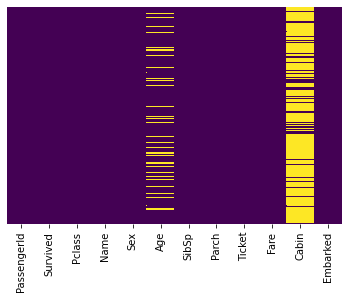

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

We see that there is a lot of null values here!

In [8]:
sns.set_style('whitegrid')

<a id="section3"></a>
## Visualizing given dataset

### [Back To Table of Contents](#toc_section)

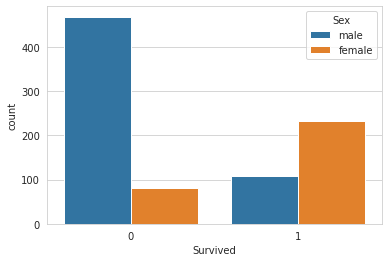

In [9]:
sns.countplot(x=train['Survived'],data=train,hue='Sex')
plt.show()

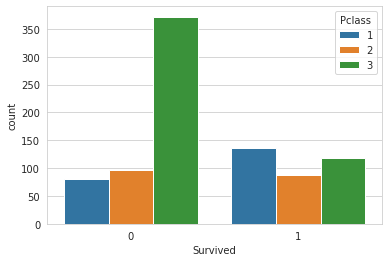

In [10]:
sns.countplot(x=train['Survived'],data=train,hue='Pclass')
plt.show()

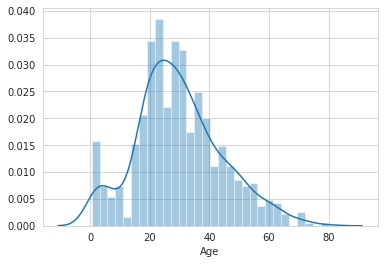

In [11]:
sns.distplot(train['Age'].dropna(),kde=True,bins=30)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


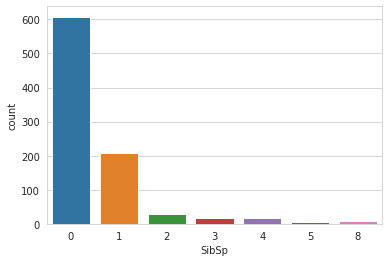

In [13]:
sns.countplot(x='SibSp',data=train)

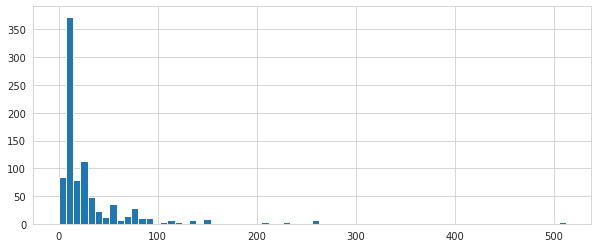

In [14]:
train["Fare"].hist(bins=70,figsize=(10,4))
plt.show()

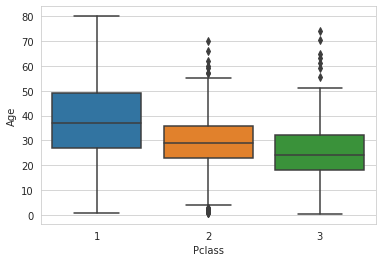

In [15]:
sns.boxplot(x='Pclass',y='Age',data=train)

<a id="section4"></a>
## Building the Feature Engineering Machine

### [Back To Table of Contents](#toc_section)


In [16]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
train['Age']=train[["Age","Pclass"]].apply(impute_age,axis=1)

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
train.drop('Cabin',inplace=True,axis=1)

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
train.dropna(inplace=True)

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
sex=pd.get_dummies(train['Sex'])
sex

Male and Female are multicollinear columns. We don't want multicollinearity in the dataset as it is bad for the model as it will make the multicollinear columns as a whole more statistically significant and reduce the significance of other columns in the model.

In [ ]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
sex

In [ ]:
embark =pd.get_dummies(train['Embarked'],drop_first=True)
embark

In [ ]:
train=pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

In [ ]:
import re
l=[]
x=0
for i in train["Name"]:
    if(str(i).find("Mr.")>0 or str(i).find("Mrs.")>0):
        l.append(1)
    else:
        l.append(0)
    print(l[x],i)
    x+=1

In [ ]:
train['Maritial_Status'] = l

In [ ]:
train.head()

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train.head()
y=train["Survived"]

<a id="section13"></a>
# Modelling
### [Back To Table of Contents](#toc_section)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaler.fit(train)
scaled_features=scaler.transform(train)
train=pd.DataFrame(scaled_features,columns=train.columns)
train.head()

In [ ]:
x=train.drop("Survived",axis=1)

In [ ]:
from sklearn.model_selection import train_test_split as tits

In [ ]:
x_train,x_test,y_train,y_test=tits(x,y,test_size=0.2,random_state=23)

In [ ]:
from sklearn.linear_model import LogisticRegression as lr

In [ ]:
logmodel=lr()

In [ ]:
logmodel.fit(x_train,y_train)

In [ ]:
predictions =logmodel.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report as cr

In [ ]:
print(cr(y_test,predictions))

In [ ]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [ ]:
test.isna().sum()

In [ ]:
test['Age']=test[["Age","Pclass"]].apply(impute_age,axis=1)

In [ ]:
test.drop('Cabin',inplace=True,axis=1)

In [ ]:
sex=pd.get_dummies(test['Sex'])
sex

In [ ]:
sex=pd.get_dummies(test['Sex'],drop_first=True)
sex

In [ ]:
embark =pd.get_dummies(test['Embarked'],drop_first=True)
embark

In [ ]:
test=pd.concat([test,sex,embark],axis=1)

In [ ]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
import re
l=[]
xx=0
for i in test["Name"]:
    if(str(i).find("Mr.")>0 or str(i).find("Mrs.")>0):
        l.append(1)
    else:
        l.append(0)
    print(l[xx],i)
    xx+=1

In [ ]:
test['Maritial_Status'] = l

In [ ]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
x.head()

In [ ]:
test.head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rdmf = RandomForestClassifier(n_estimators=100,max_depth=5, criterion='entropy')
rdmf.fit(x,y)

In [ ]:
scaler.fit(test)
scaled_features=scaler.transform(test)
test=pd.DataFrame(scaled_features,columns=test.columns)
test.head()

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x,y)

In [ ]:
test['Fare'] = test['Fare'].fillna((test['Fare'].mean()))

After a lot of experimenting I went with the random forest model as it gave the best accuracy.

In [ ]:
predictions =rdmf.predict(test)

In [ ]:
ft=pd.read_csv('/kaggle/input/titanic/test.csv')

In [ ]:
predi = pd.DataFrame(predictions, columns=['predictions'])
predi.head()

In [ ]:
data = [ft["PassengerId"], predi["predictions"]]
headers = ["PassengerId", "Survived"]
final = pd. concat(data, axis=1, keys=headers)

In [ ]:
final.to_csv("res1.csv",index=False)